In [34]:
import pandas as pd
import numpy as np
df=pd.read_csv('G:\\Users\HP\Downloads\projectDataset_1.csv')

In [35]:
df.head()

,State,Crop,District,Year,Season,Area,Production,Yield,SO2,NO2,RSPM,SPM
0,Chhattisgarh,Arhar/Tur,Bilaspur,2013,Kharif,2308.0,1474,0.64,5.291667,21.473958,119.71875,389.201373
1,Chhattisgarh,Bajra,Bilaspur,2013,Kharif,14.0,7,0.50,5.291667,21.473958,119.71875,389.201373
2,Chhattisgarh,Barley,Bilaspur,2013,Rabi,3.0,2,0.67,5.291667,21.473958,119.71875,389.201373
3,Chhattisgarh,Coriander,Bilaspur,2013,Whole Year,243.0,66,0.27,5.291667,21.473958,119.71875,389.201373
4,Chhattisgarh,Dry chillies,Bilaspur,2013,Whole Year,405.0,369,0.91,5.291667,21.473958,119.71875,389.201373


In [3]:
df1=df.loc[df['Crop']=='Rice']

In [4]:
df1.corr(method='pearson')#Correlation

,Year,Area,Production,Yield,SO2,NO2,RSPM,SPM
Year,1.000000,-0.027954,0.025848,0.177087,-0.212060,-0.174572,-0.110139,-0.098903
Area,-0.027954,1.000000,0.856919,0.098074,0.152981,0.224954,0.299279,0.171751
Production,0.025848,0.856919,1.000000,0.370590,0.079327,0.175786,0.272752,0.137093
Yield,0.177087,0.098074,0.370590,1.000000,-0.132239,-0.063671,-0.056557,-0.022603
SO2,-0.212060,0.152981,0.079327,-0.132239,1.000000,0.642214,0.416294,0.284954
NO2,-0.174572,0.224954,0.175786,-0.063671,0.642214,1.000000,0.494136,0.312168
RSPM,-0.110139,0.299279,0.272752,-0.056557,0.416294,0.494136,1.000000,0.576816
SPM,-0.098903,0.171751,0.137093,-0.022603,0.284954,0.312168,0.576816,1.000000


In [24]:
from sklearn.ensemble import RandomForestRegressor
from numpy.core.umath_tests import inner1d
from sklearn.model_selection import train_test_split
rf=RandomForestRegressor(n_estimators=50,random_state=100)
rf.fit

<bound method BaseForest.fit of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=100, verbose=0, warm_start=False)>

# Variation Of SO2 and NO2 gases with Crops

In [20]:
#so2 #no2
#crops=Rice,Jute,Wheat,Barley,Maize
df=df.loc[df['Crop']=='Rice']

In [21]:
from sklearn import metrics
from sklearn import preprocessing
cat_col=['State','District','Crop','Season',]
le=preprocessing.LabelEncoder()
for i in cat_col:
    le.fit(list(df[i].unique()))
    df[i]=le.transform(df[i])
x=df.drop(['Yield'],axis=1)
y=df['Yield']

In [10]:
x_gases=df.drop(['Yield'],axis=1).iloc[:,0:9].values
x_train,x_test,y_train,y_test=train_test_split(x_gases,df.iloc[:,7:8].values,test_size=0.2,random_state=20)
regressor=RandomForestRegressor(n_estimators=10,random_state=10)
regressor.fit(x_train,y_train.ravel())
y_pred=regressor.predict(x_test)
#Errors
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
#20-fold cross validation
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
RF_accuracies=cross_val_score(regressor,x_train,y_train,cv=20)
print('Mean_Rclf_Acc:',RF_accuracies.mean()) #prediction score

Mean Absolute Error: 0.23412121212121212
Root Mean Squared Error: 0.32786968494057256
Mean_Rclf_Acc: 0.8551887018101627


# Variation Of RSPM SPM with Crops

In [32]:
#RSPM #SPM
#crops=Rice,Wheat,Sugarcane,Maize
df=df.loc[df['Crop']=='Maize']

In [33]:
from sklearn import metrics
from sklearn import preprocessing
cat_col=['State','District','Crop','Season',]
le=preprocessing.LabelEncoder()
for i in cat_col:
    le.fit(list(df[i].unique()))
    df[i]=le.transform(df[i])
x=df.drop(['Yield'],axis=1)
y=df['Yield']

In [28]:
x_pm=df.drop(['Yield','SO2','NO2'],axis=1).iloc[:,0:11].values
x_train,x_test,y_train,y_test=train_test_split(x_pm,df.iloc[:,7:8].values,test_size=0.2,random_state=20)
regressor=RandomForestRegressor(n_estimators=10,random_state=10)
regressor.fit(x_train,y_train.ravel())
y_pred=regressor.predict(x_test)
#Errors
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
#20-fold cross validation
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
RF_accuracies=cross_val_score(regressor,x_train,y_train,cv=20)
print('Mean_Rclf_Acc:',RF_accuracies.mean()) #prediction score

Mean Absolute Error: 0.31895726495726495
Root Mean Squared Error: 0.49332757561897644
Mean_Rclf_Acc: 0.8039790566252712


# KNN Model

In [36]:
#Gases Variation with crops
#RICE,JUTE,BARLEY,MAIZE

In [37]:
df=df.loc[df['Crop']=='Maize']

In [38]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing 
cat_col=['State','District','Crop','Season','Yield','SO2','NO2','Area','RSPM','SPM']
le=preprocessing.LabelEncoder()
for i in cat_col:
    le.fit(list(df[i].unique()))
    df[i]=le.transform(df[i])
x=df.drop(['Yield','RSPM','SPM'],axis=1)
y=df['Yield']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [41]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[7 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
             precision    recall  f1-score   support

          0       0.50      0.78      0.61         9
          4       0.00      0.00      0.00         1
          7       0.00      0.00      0.00         0
          9       0.00      0.00      0.00         1
         10       0.00      0.00      0.00         0
         11       0.00      0.00      0.00         0
         17       0.00      0.00      0.00         1
         19       0.00      0.00      0.00         1
         20       0.00      0.00      0.00         1
         21       0.00      0.00      0.00         0
         23       0.00      0.00      0.00         0
         24       0.00      0.00      0.00         0
         25       0.00      0.00      0.00         0
         28       0.00      0.00      0.00         0
         29       0.00      0.00      0.00         1
         30       0.50      0.5

In [42]:
error=[]
#calculating error for K values between 1 and 50
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i=knn.predict(x_test)
    error.append(np.mean(pred_i!=y_test))

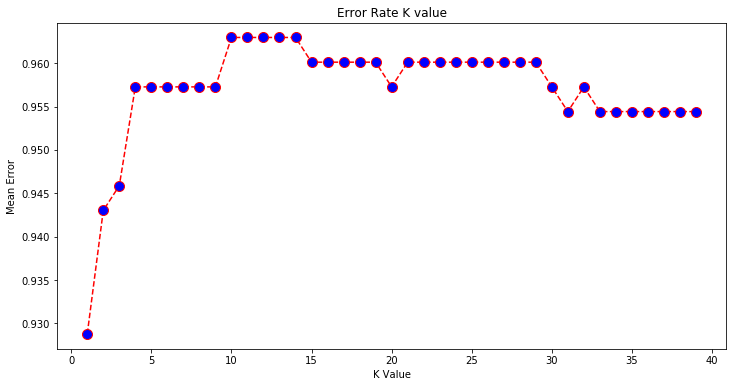

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.title('Error Rate K value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)